In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_excel('/Users/akash/Downloads/ex8data1.xlsx', sheet_name='X', header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


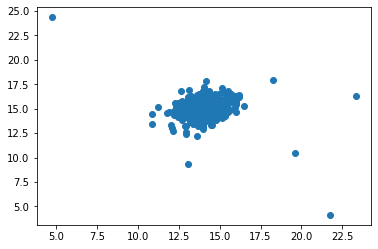

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [7]:
m = len(df)

307

In [8]:
# Mean
s = np.sum(df, axis=0)
mu = s/m
mu

0    14.112226
1    14.997711
dtype: float64

In [9]:
# Variance
vr = np.sum((df - mu)**2, axis=0)
variance = vr/m
variance

0    1.832631
1    1.709745
dtype: float64

In [10]:
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [11]:
k = len(mu)
X = df - mu
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

In [12]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    var_dia = np.diag(variance)
    k = len(mu)
    X = df - mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

In [16]:
cvx = pd.read_excel('/Users/akash/Downloads/ex8data1.xlsx', sheet_name='Xval', header=None)
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


In [18]:
cvy = pd.read_excel('/Users/akash/Downloads/ex8data1.xlsx', sheet_name='y', header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [32]:
p1 = probability(cvx)

In [20]:
y = np.array(cvy)

In [21]:
p.describe()

count    3.070000e+02
mean     5.905331e-02
std      2.324461e-02
min      1.181209e-23
25%      4.361075e-02
50%      6.510144e-02
75%      7.849532e-02
max      8.986095e-02
dtype: float64

In [27]:
def tpfpfn(ep, p):
    tp, fp, fn = 0, 0, 0
    for i in range(len(y)):
        if p[i] <= ep and y[i][0] == 1:
            tp += 1
        elif p[i] <= ep and y[i][0] == 0:
            fp += 1
        elif p[i] > ep and y[i][0] == 1:
            fn += 1
    return tp, fp, fn

In [28]:
eps = [i for i in p1 if i <= p1.mean()]

In [29]:
len(eps)

128

In [30]:
def f1(ep, p):
    tp, fp, fn = tpfpfn(ep)
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    f1 = 2*prec*rec/(prec + rec)
    return f1

In [33]:
f = []
for i in eps:
    f.append(f1(i, p1))
f

TypeError: tpfpfn() missing 1 required positional argument: 'p'